In [1]:
import numpy as np
import matplotlib.pyplot as plt

import utils

In [2]:
kyma = utils.generate_radia_model(nr_periods=6, solve=False)

In [17]:
def get_field_on_axis(kyma, rz, plot_flag=True):
    field = kyma.get_field(0, 0, rz)
    bx = field[:, 0]
    by = field[:, 1]
    bz = field[:, 2]

    if plot_flag:
        plt.plot(rz, bx, label='Bx')
        plt.plot(rz, by, label='By')
        plt.plot(rz, bz, label='Bz')
        plt.xlabel('rz [mm]')
        plt.ylabel('Field [T]')
        plt.legend()
        plt.grid()
        plt.show()

    return bx, by, bz

In [4]:
def get_field_roll_off(kyma, rx, peak_idx, filter='on', plot_flag=True):
    """."""
    period = kyma.period_length
    rz = np.linspace(-period/2, period/2, 100)
    field = kyma.get_field(0, 0, rz)
    by = field[:, 1]
    by_max_idx = np.argmax(by)
    rz_at_max = rz[by_max_idx] + peak_idx*period
    field = kyma.get_field(rx, 0, rz_at_max)
    by = field[:, 1]
    by_list = list()
    if filter == 'on':
        for i in range(len(rx)):
            if i >= 6 and i <= len(rx)-7:
                by_temp = by[i-6] + by[i-5] + by[i-4] + by[i-3]
                by_temp += by[i-2] + by[i-1] + by[i] + by[i+1] + by[i+2]
                by_temp += by[i+3] + by[i+4] + by[i+5] + by[i+6]
                by_temp = by_temp/13
                by_list.append(by_temp)
        by_avg = np.array(by_list)
        rx_avg = rx[6:-6]
    else:
        by_avg = by
        rx_avg = rx
    rx5_idx = np.argmin(np.abs(rx_avg - 5))
    rx0_idx = np.argmin(np.abs(rx_avg))
    roff = np.abs(by_avg[rx5_idx]/by_avg[rx0_idx]-1)
    print('roll off = ', 100*roff, '%')
    if plot_flag:
        plt.plot(rx, by)
        plt.xlabel('x [mm]')
        plt.ylabel('By [T]')
        plt.title('Field rolloff at x = 5 mm for Gap 8.0 mm')
        plt.grid()
        plt.show()


In [5]:
rz = np.linspace(-150, 150, 501)
rx = np.linspace(-40, 40, 4*81)

In [22]:
kyma.dg = 0

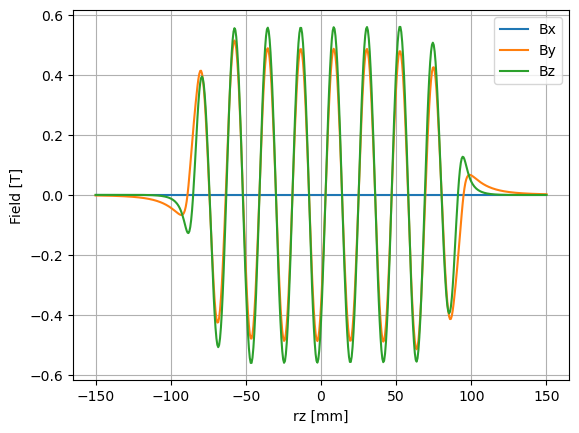

In [21]:
bx, by, bz = get_field_on_axis(kyma, rz)

roll off =  0.576636118029894 %


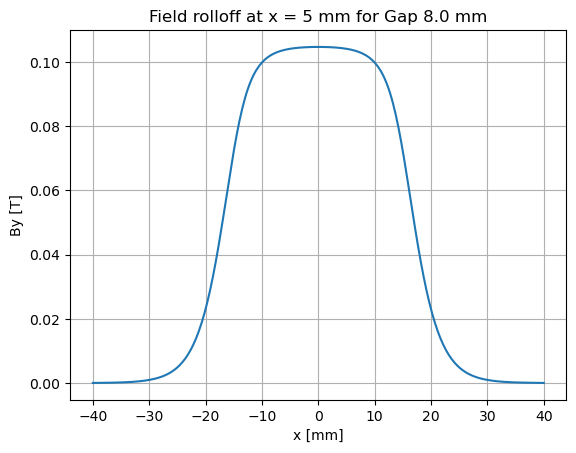

In [19]:
get_field_roll_off(kyma, rx, 0, filter='off', plot_flag=True)